In [41]:
function showrankings(IndextoTeams,Rankings)
           HelperDict = Dict{Any, Any}
           RatingsDict = Dict{Any, Any}
           for key in collect(keys(IndextoTeams))
              HelperDict[IndextoTeams[key]] = key
    end
           for i = 1:32
             RatingsDict[HelperDict[i]] = Rankings[i]
           end
           for key in sort(collect(keys(RatingsDict)))
           println("$key => $(dict[key])")
           end
    end

showrankings (generic function with 1 method)

In [6]:
using DelimitedFiles
using LinearAlgebra 

Data = readdlm("reg_games_2009.csv.txt", ',')

257×10 Array{Any,2}:
 "type"            "game_id"  "home_team"  …    "home_score"    "away_score"
 "reg"   2009091000           "PIT"           13              10            
 "reg"   2009091304           "CLE"           20              34            
 "reg"   2009091307           "NO"            45              27            
 "reg"   2009091308           "TB"            21              34            
 "reg"   2009091305           "HOU"        …   7              24            
 "reg"   2009091306           "IND"           14              12            
 "reg"   2009091303           "CIN"            7              12            
 "reg"   2009091302           "CAR"           10              38            
 "reg"   2009091301           "BAL"           38              24            
 "reg"   2009091300           "ATL"        …  19               7            
 "reg"   2009091309           "ARI"           16              20            
 "reg"   2009091311           "SEA"           28       

In [7]:
teamsToIndex = Dict("NYJ" => 1, "SD" => 2, "NYG" => 3, "DAL" => 4, "PIT" => 5, "DET" => 6, "ARI" => 7, "MIN" => 8, "NE" => 9, "TB" => 10, "GB" => 11, "SF" => 12, "BUF" => 13, "TEN" => 14, "DEN" => 15, "IND" => 16, "PHI" => 17, "HOU" => 18, "WAS" => 19, "CIN" => 20, "OAK" => 21, "BAL" => 22, "CHI" => 23, "ATL" => 24, "CLE" => 25, "STL" => 26, "JAC" => 27, "MIA" => 28, "SEA" => 29, "NO" => 30, "KC" => 31, "CAR" => 32)

Dict{String,Int64} with 32 entries:
  "DET" => 6
  "BUF" => 13
  "CIN" => 20
  "SD"  => 2
  "PIT" => 5
  "HOU" => 18
  "CLE" => 25
  "NE"  => 9
  "STL" => 26
  "MIA" => 28
  "IND" => 16
  "TEN" => 14
  "SF"  => 12
  "DAL" => 4
  "BAL" => 22
  "PHI" => 17
  "NYG" => 3
  "ARI" => 7
  "NO"  => 30
  "MIN" => 8
  "TB"  => 10
  "DEN" => 15
  "GB"  => 11
  "CHI" => 23
  "SEA" => 29
  ⋮     => ⋮

In [10]:
Scores = zeros(Int, size(Data,1)-1,1)
WeightedScores = zeros(Float64, size(Data, 1)-1,1)
MainMasseyMatrix = zeros(Int, size(Data,1)-1,32)

256×32 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0   

In [11]:
for i = 2:size(Data,1)
    MainMasseyMatrix[i-1,teamsToIndex[Data[i,3]]] = 1
    MainMasseyMatrix[i-1,teamsToIndex[Data[i,4]]] = -1
end
for i = 2:size(Data,1)
    Scores[i-1,1] = Data[i,9] - Data[i,10]
    WeightedScores[i-1,1] = (Data[i,9] - Data[i,10])*(1 + (Data[i,5]-1)*(1/16))
end
WeightedScores

256×1 Array{Float64,2}:
   3.0
 -14.0
  18.0
 -13.0
 -17.0
   2.0
  -5.0
 -28.0
  14.0
  12.0
  -4.0
  28.0
   6.0
   ⋮  
  74.0
 -12.0
  14.0
 -28.0
  12.0
 -40.0
 -52.0
   6.0
 -16.0
  48.0
  -8.0
  74.0

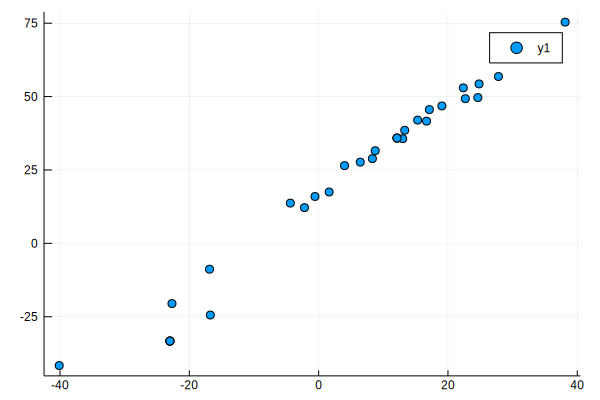

In [12]:
using LinearAlgebra
U,σ,V = svd(MainMasseyMatrix)
Eplus = zeros(Float64, 32,32)
EplusApproximate = zeros(Float64, 32, 32)
E = zeros(Float64, 32,32)
for x = 1:16#32
    Eplus[x,x] = 1/σ[x]
    E[x,x] = σ[x]
    if x<10
        EplusApproximate[x,x] = 1/σ[x]
    end
end
MasseyRanks = inv(transpose(MainMasseyMatrix)*MainMasseyMatrix)*transpose(MainMasseyMatrix)*Scores
WeightedMasseyRanks = inv(transpose(MainMasseyMatrix)*MainMasseyMatrix)*transpose(MainMasseyMatrix)*WeightedScores
using Plots
plot(MasseyRanks, WeightedMasseyRanks, seriestype=:scatter)


In [43]:
PCARanks = V*Eplus*transpose(U)*Scores
WeightedPCARanks = V*Eplus*transpose(U)*WeightedScores
PCAApproximateRanks = V*EplusApproximate*transpose(U)*Scores
sum = 0;
Weightedsum = 0;
Approximatesum = 0;
for i = 1:20
    sum+= PCARanks[i,1]
    Weightedsum +=WeightedPCARanks[i,1]
    Approximatesum += PCAApproximateRanks[i,1]
end
avg = sum/32
Weightedavg = Weightedsum/32
Approximateavg = Approximatesum/32
for i = 1:32
    PCARanks[i,1] = PCARanks[i,1] - avg
    WeightedPCARanks[i,1] = WeightedPCARanks[i,1] - Weightedavg
    PCAApproximateRanks[i,1] = PCAApproximateRanks[i,1] - Approximateavg

end
plot(PCARanks,PCAApproximateRanks,seriestype=:scatter)
showrankings(teamsToIndex,PCARanks)

MethodError: MethodError: no method matching setindex!(::Type{Dict{Any,Any}}, ::String, ::Int64)

In [16]:
plot(PCARanks, MasseyRanks,seriestype=:scatter)
MasseyRanks

32×1 Array{Float64,2}:
   6.4375
  17.125 
  16.6875
  19.0625
  12.125 
 -16.875 
 -16.75  
  12.125 
   8.3125
   1.625 
  22.375 
 -23.0   
  15.3125
   ⋮     
  13.3125
  12.125 
 -22.6875
  24.625 
   4.0   
  -0.5625
 -23.0   
  38.125 
 -23.0   
  22.6875
 -40.125 
  -4.375 

In [25]:
KeenerMain = zeros(Float64,32,32)
for i = 2:size(Data,1)
    point1 = (Data[i,9] + 1)/(Data[i,9] + Data[i,10] + 2)
    point2 = (Data[i,10] + 1)/(Data[i,9] + Data[i,10] + 2)
    KeenerMain[teamsToIndex[Data[i,3]],teamsToIndex[Data[i,4]]] = (1/2) + ((sign(point1 - (1/2)))*(sqrt(abs(2*point1 -1))))/2
    KeenerMain[teamsToIndex[Data[i,4]],teamsToIndex[Data[i,3]]] = (1/2) + ((sign(point2 - (1/2)))*(sqrt(abs(2*point2 -1))))/2
    #normalize data
end
# for i = 1:32
#     for j = 1:32
#         if KeenerMain[i,j] == 0
#             KeenerMain[i,j] = 10^(-15)
#         end
#     end
#end
KeenerMain

32×32 Array{Float64,2}:
 0.0        0.0       0.0        0.0       …  0.188195  0.0       0.831662
 0.0        0.0       0.576249   0.638675     0.0       0.850544  0.0     
 0.0        0.423751  0.0        0.675219     0.238884  0.747207  0.107768
 0.0        0.361325  0.324781   0.0          0.701737  0.676777  0.841565
 0.0        0.691741  0.0        0.0          0.0       0.381042  0.0     
 0.0        0.0       0.0        0.0       …  0.253402  0.0       0.0     
 0.0        0.0       0.701737   0.0          0.0       0.0       0.261217
 0.0        0.0       0.917766   0.0          0.0       0.0       0.131606
 0.800708   0.0       0.0        0.0          0.196512  0.0       0.779508
 0.0693216  0.0       0.0196155  0.261217     0.638675  0.0       0.177251
 0.0        0.0       0.0        0.810087  …  0.0       0.0       0.0     
 0.0        0.0       0.0        0.0          0.0       0.0       0.0     
 0.289958   0.0       0.0        0.0          0.127322  0.731455  0.797842
 

In [26]:
Keenervals, Keenervecs = eigen(KeenerMain)

Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
eigenvalues:
32-element Array{Complex{Float64},1}:
   6.1486859352512155 + 0.0im                
   3.1186191078889243 + 0.1810763028563055im 
   3.1186191078889243 - 0.1810763028563055im 
   2.1375119050338296 + 0.0im                
  -1.7845381790090113 + 0.0im                
   0.9054092037889538 + 0.0im                
  -1.2158010777559793 + 0.893366260051994im  
  -1.2158010777559793 - 0.893366260051994im  
 -0.22537267927985705 + 1.0648109084986355im 
 -0.22537267927985705 - 1.0648109084986355im 
   0.5657833382948081 + 0.20597068119054723im
   0.5657833382948081 - 0.20597068119054723im
  0.10956638156896042 + 0.8159248423190755im 
                      ⋮                      
  -1.2799193557976185 - 0.2695053450070018im 
  -1.2245209563634836 + 0.2932104335208136im 
  -1.2245209563634836 - 0.2932104335208136im 
  -0.6002317661126422 + 0.5382452724854023im 
  -0.6002317661126422 - 0.53

In [27]:
Keenersolution = zeros(Float64, 32, 1)
for i = 1:32
  Keenersolution[i] =convert(Float64, Keenervecs[i,1])
end
sum = 0
for i = 1:32
  sum+=Keenersolution[i]
end
for i = 1:32
    Keenersolution[i] = Keenersolution[i]/sum
end
Keenersolution


32×1 Array{Float64,2}:
 0.04126309374385393 
 0.04247731086292954 
 0.03130932811783431 
 0.0414426054481401  
 0.03579108220340435 
 0.01667282723791923 
 0.02990913254467808 
 0.03507000649355648 
 0.04375222467085834 
 0.0224294397308786  
 0.03833549845223588 
 0.028251944663445733
 0.02890973029237946 
 ⋮                   
 0.022161585901546092
 0.036421992910975864
 0.02608617825888375 
 0.03593592106520639 
 0.02393711467648375 
 0.014950664601344059
 0.023374812399460616
 0.03087952297582276 
 0.019904629305788037
 0.041432350838007434
 0.02580599294252572 
 0.03515198390637667 

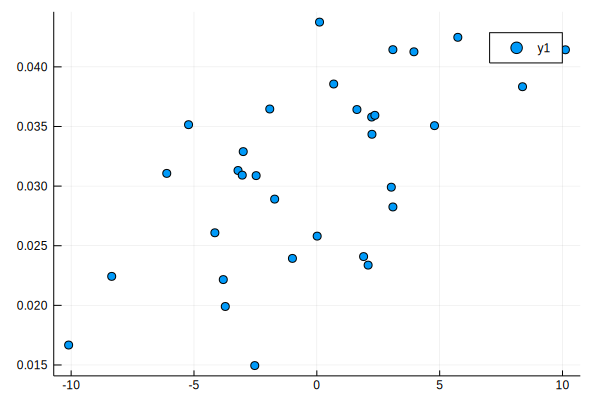

In [29]:
plot(PCARanks, Keenersolution,seriestype=:scatter)